In [1]:
# https://docs.snowflake.com/en/user-guide/python-connector-api.html
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# Don't collapse Pandas Dataframes:
pd.set_option('display.max_rows', None, 'display.max_columns', None)

# Set Global Float for Rounding
pd.options.display.float_format = '{:20,.3f}'.format

In [2]:
df = pd.read_csv('queries-relevance.csv')

In [3]:
df.sort_values(by='Precision@5', ascending=False).head(10)

,keyword,nDCG@5,Precision@5,Recall@5,MRR
4133,segment violation,1.000,1.000,0.714,1.000
5794,radiofrequency coupling,1.000,1.000,0.500,1.000
5184,weight gain,1.000,1.000,0.833,1.000
2582,average pores size,1.000,1.000,0.833,1.000
5844,carmine dye,1.000,1.000,0.278,1.000
1338,separation,1.000,1.000,0.556,1.000
29,central hub,1.000,1.000,0.625,1.000
4543,segment evaluation for well planning,1.000,1.000,0.625,1.000
5795,rf coaxial cable transmission,1.000,1.000,0.714,1.000
1181,aluminium al compound,1.000,0.800,0.667,1.000


In [4]:
# df = df.fillna(0)
df = df.dropna()
keyword_list = df['keyword'].to_list()

In [5]:
data_df = df

In [6]:
feature_list = ['nDCG@5','Precision@5','Recall@5','MRR']

'Relevance' denotes how well a retrieved document meets a user's information need.
'Information Need' is a desire to locate and obtain information to satisfy a conscious or unconscious need.
A good way to measure performance for a Precision or Recall curve is to see if the new curve has greater AUC (area under curve) than the previous curve (in which case, greater AUC is better performance).


feature: nDCG@5


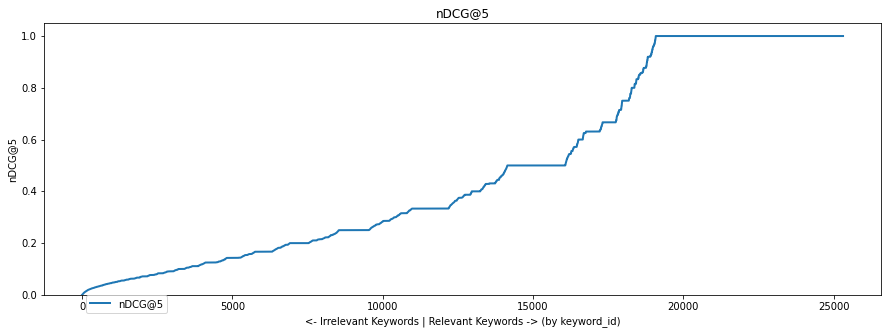

feature: Precision@5


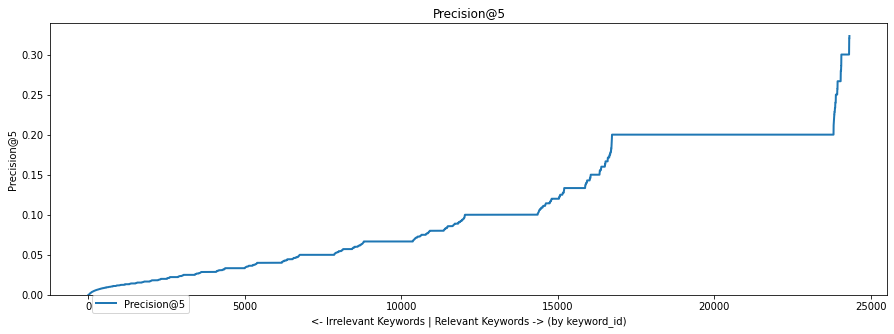

feature: Recall@5


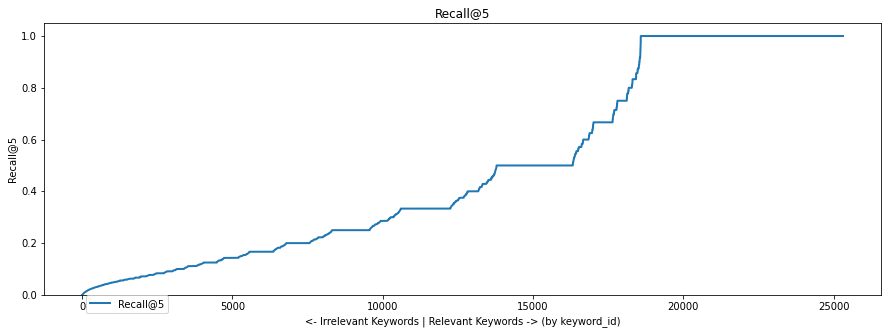

feature: MRR


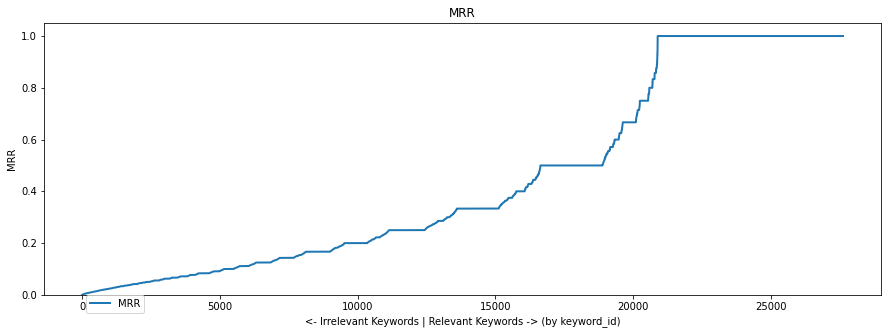

In [7]:
print("'Relevance' denotes how well a retrieved document meets a user's information need.")
print("'Information Need' is a desire to locate and obtain information to satisfy a conscious or unconscious need.")
print('A good way to measure performance for a Precision or Recall curve is to see if the new curve has greater AUC (area under curve) than the previous curve (in which case, greater AUC is better performance).')
print('\n')
for feature in feature_list:
    avg_value = data_df['{0}'.format(feature)].mean()
    # print(avg_value)
    max_value = avg_value * 3 # arbitrarily chose 3
    # print(max_value)
    plot_df = data_df
    plot_df = plot_df[plot_df['{0}'.format(feature)] < max_value]  
    # print(plot_df.head())
    print('feature: {0}'.format(feature))
    plot_df = plot_df.loc[plot_df['{0}'.format(feature)] != 0] # Removes keywords with value = 0 from the graph
    plot_df = plot_df.sort_values(by='{0}'.format(feature), ascending=True).reset_index(drop=True)
    plot_df['keyword_id'] = plot_df.index
    plot_df = plot_df[['keyword_id','{0}'.format(feature)]]
    # print(plot_df.head())
    ## Resize Plot:
    plt.rcParams['figure.figsize'] = [15, 5] 

    ## Plot Settings
    axis = plt.gca() # gca = get current axis

    ## Series in Plot - Axis:
    plot_df.plot(kind='line', 
            x='keyword_id', 
            y='{0}'.format(feature),
            linewidth = 2,
            ax = axis)

    ## Set Plot Legend:
    axis.legend(bbox_to_anchor=(0.05, 0), loc='upper left', borderaxespad=0.)
    ## Disable Scientific Notation:
    axis.ticklabel_format(style='plain', axis='y')
    ## Title of Plot:
    plt.title('{0}'.format(feature))
    ## Y Axis Labels:
    axis.set_ylabel('{0}'.format(feature))
    axis.set_xlabel('<- Irrelevant Keywords | Relevant Keywords -> (by keyword_id)')
    # axis.set_xticklabels([]) # Remove X Axis Labels
    ## Set Cumulative Impact Axis Set "0" at Middle (for Axix2):
    yabs_max = abs(max(axis.get_ylim(), key=abs))
    axis.set_ylim(ymin=0) # Sets Y Minimum value
    ## Display Plot:
    plt.show()